In [69]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from libpysal import weights
import networkx as nx

import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\laszlovreedenb\OneDrive - Delft University of Technology\Documents\code\flee\data_assimilation\test


In [70]:
# Load the shapefile
# shapefile_path = '../../disaster_sources/mozambique/moz_adm_shp/moz_admbnda_adm3_ine_20190607.shp'
# gdf = gpd.read_file(shapefile_path)
# zambezia_gdf = gdf[gdf['ADM1_PCODE'] == 'MZ11'].reset_index(drop=True)
# zambezia_gdf[:10]

shapefile_path = '../../disaster_sources/mozambique/moz_admbnda_adm3_ine__km2/moz_admbnda_adm3_ine_20190910_km2.shp'
gdf = gpd.read_file(shapefile_path)
zambezia_gdf = gdf[gdf['admin1Pcod'] == 'MZ11'].reset_index(drop=True)
zambezia_gdf[:10]


DataSourceError: ../../disaster_sources/mozambique/moz_admbnda_adm3_ine__km2/moz_admbnda_adm3_ine_20190910_km2.shp: No such file or directory

C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_22812\1658522710.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  queen = weights.Queen.from_dataframe(zambezia_gdf)


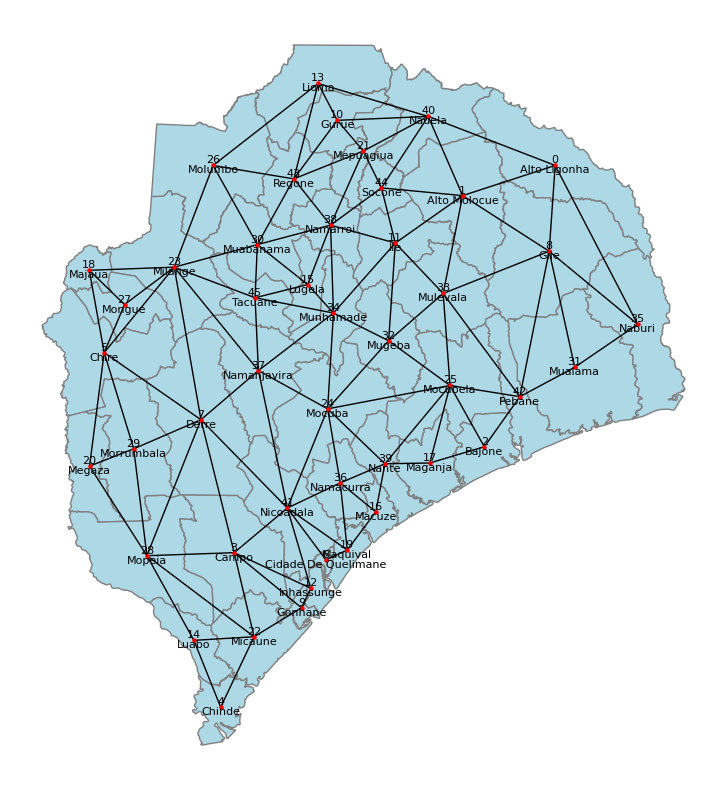

In [71]:
# extract the centroids for connecting the regions, which is
# the average of the coordinates that define the polygon's boundary
# Note: When actually using this, the centroid will not be the place where moest people live and move from.
centroids = np.column_stack((zambezia_gdf.centroid.x, zambezia_gdf.centroid.y))

# construct the "Queen" adjacency graph. In geographical applications,
# the "Queen" adjacency graph considers two polygons as connected if
# they share a single point on their boundary. 
queen = weights.Queen.from_dataframe(zambezia_gdf)
# print(queen)

# Then, we can convert the graph to networkx object using the
# .to_networkx() method.
graph = queen.to_networkx()
# print(graph)

# # To plot with networkx, we need to merge the nodes back to
# # their positions in order to plot in networkx
positions = dict(zip(graph.nodes, centroids))
# print(positions)

# Add edge lengths as attributes (distance between centroids)
for u, v in graph.edges():
    x1, y1 = positions[u]
    x2, y2 = positions[v]
    length = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    graph[u][v]['length'] = length


# # plot with a nice basemap
fig, ax = plt.subplots(figsize=(10, 10))
zambezia_gdf.plot(linewidth=1, edgecolor="grey", facecolor="lightblue", ax=ax)
# Add labels at centroids
for idx, row in zambezia_gdf.iterrows():
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, zambezia_gdf.iloc[idx]['admin3Name'], fontsize=8, ha='center', va='top', color='black')


nx.draw(graph, positions, ax=ax, node_size=5, node_color="r")
nx.draw_networkx_labels(graph, positions, ax=ax, font_size=8, verticalalignment='bottom')
plt.show()

In [72]:
# Reproject to lon/lat and get centroids
zambezia_gdf_lonlat = zambezia_gdf.to_crs(epsg=4326)
centroids_lonlat = np.column_stack((zambezia_gdf_lonlat.centroid.x, zambezia_gdf_lonlat.centroid.y))

# Add as new columns
zambezia_gdf['centroid_lon'] = centroids_lonlat[:, 0]
zambezia_gdf['centroid_lat'] = centroids_lonlat[:, 1]
zambezia_gdf[:10]

C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_22812\1117705881.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids_lonlat = np.column_stack((zambezia_gdf_lonlat.centroid.x, zambezia_gdf_lonlat.centroid.y))


OBJECTID           admin3Name admin3Pcod admin3RefN admin3AltN admin3Al_1  \
0         3         Alto Ligonha   MZ110501       None       None       None   
1         4         Alto Molocue   MZ110101       None       None       None   
2        11               Bajone   MZ111501       None       None       None   
3        24                Campo   MZ111701       None       None       None   
4        49               Chinde   MZ110201       None       None       None   
5        58                Chire   MZ111801       None       None       None   
6        80  Cidade De Quelimane   MZ110301       None       None       None   
7        91                Derre   MZ110401       None       None       None   
8       106                 Gile   MZ110502       None       None       None   
9       109              Gonhane   MZ110801       None       None       None   

            admin2Name admin2Pcod admin1Name admin1Pcod  ... admin0Pcod  \
0                 Gile     MZ1105   Zambezia       MZ11  ...         MZ   
1         Alto Molocue     MZ1101   Zambezia       MZ11  ...         MZ   
2             Mocubela     MZ1115   Zambezia       MZ11  ...         MZ   
3               Mopeia     MZ1117   Zambezia       MZ11  ...         MZ   
4               Chinde     MZ1102   Zambezia       MZ11  ...         MZ   
5           Morrumbala     MZ1118   Zambezia       MZ11  ...         MZ   
6  Cidade De Quelimane     MZ1103   Zambezia       MZ11  ...         MZ   
7                Derre     MZ1104   Zambezia       MZ11  ...         MZ   
8                 Gile     MZ1105   Zambezia       MZ11  ...         MZ   
9           Inhassunge     MZ1108   Zambezia       MZ11  ...         MZ   

        date    validOn validTo Shape_Leng Shape_Area          km2  \
0 2019-04-02 2019-06-07     NaT   3.980541   0.328787  3900.627066   
1 2019-04-02 2019-06-07     NaT   3.154156   0.315408  3738.844663   
2 2019-04-02 2019-06-07     NaT   2.336629   0.114528  1348.087145   
3 2019-04-02 2019-06-07     NaT   3.306913   0.312639  3668.170692   
4 2019-04-02 2019-06-07     NaT   2.417263   0.087756  1024.632083   
5 2019-04-02 2019-06-07     NaT   3.404664   0.282486  3333.964333   
6 2019-04-02 2019-06-07     NaT   0.586949   0.010371   121.662196   
7 2019-04-02 2019-06-07     NaT   3.333202   0.402970  4746.788748   
8 2019-04-02 2019-06-07     NaT   3.591334   0.428881  5076.389744   
9 2019-04-02 2019-06-07     NaT   0.947010   0.021268   249.111677   

                                            geometry  centroid_lon  \
0  POLYGON ((1331254.796 -1798579.831, 1331380.15...     38.325947   
1  POLYGON ((1326383.693 -1829361.041, 1326397.10...     37.752281   
2  POLYGON ((1336544.17 -2005771.063, 1342400.622...     37.895245   
3  POLYGON ((1132864.829 -2058199.197, 1138132.39...     36.344782   
4  MULTIPOLYGON (((1163575.637 -2207006.697, 1163...     36.265479   
5  POLYGON ((1061754.6 -1926256.036, 1061853.178 ...     35.531450   
6  POLYGON ((1217645.119 -2103120.341, 1217617.14...     36.915137   
7  POLYGON ((1131116.84 -1957800.099, 1131198.356...     36.134364   
8  POLYGON ((1399437.221 -1908270.157, 1399387.85...     38.291383   
9  MULTIPOLYGON (((1212882.342 -2138440.375, 1212...     36.764763   

  centroid_lat  
0   -15.659667  
1   -15.829796  
2   -17.225211  
3   -17.823950  
4   -18.690600  
5   -16.711103  
6   -17.861756  
7   -17.082770  
8   -16.135612  
9   -18.130413  

[10 rows x 22 columns]

In [73]:
pop_df_all = pd.read_excel('../../disaster_sources/mozambique/Mozambique_pop_us_census.xlsx')
pop_df = pop_df_all[pop_df_all['CODE'].str.startswith('MZ004')]
pop_df = pop_df[pop_df['ADM_LEVEL']==3]
pop_df = pop_df[pop_df['YR']==2023].reset_index(drop=True)
pop_df

FileNotFoundError: [Errno 2] No such file or directory: '../../disaster_sources/mozambique/Mozambique_pop_us_census.xlsx'

In [74]:
# Create dictionary to use the UN name for the regions
name_pop_dict = {'Alto Molócuè Sede':'Alto Molocue',
                 'Chinde Sede':'Chinde',
                 'Gilé':'Gile',
                 'Cidade de Guruè':'Gurue',
                 'Cidade de Mocuba':'Mocuba',
                 'Lugela Sede': 'Lugela',
                 'Mucupia':'Inhassunge',
                 'Macuse':'Macuze',
                 'Maganja da Costa':'Maganja',
                 'Milange Sede':'Milange',
                 'Mopeia Sede': 'Mopeia',
                 'Morrumbala Sede': 'Morrumbala',
                 'Namacurra Sede': 'Namacurra',
                 'Pebane Sede': 'Pebane',
                 'Quelimane':'Cidade De Quelimane',
                 'Mulela':'Mualama',
                 }


pop_df['BASENAME']= pop_df['BASENAME'].replace(name_pop_dict)

# Derre is not split in the UN data, but is in the Census data, drop Machindo and Guerissa
# Luabo is not split in the UN data, but is in the Census data, drop Samora Machel and Chimbadzo 
# Mulevala is not in the UN data, but is in the Census data, drop M Bauane and Chiraco
pop_df_adm2 = pop_df_all[pop_df_all['BASENAME'].isin(['Derre', 'Luabo', 'Mulevala', 'Molumbo', 'Nicoadala'])]
pop_df_adm2 = pop_df_adm2[pop_df_adm2['YR']==2023].reset_index(drop=True)

# Drop specific BASENAME values from pop_df
to_drop = ['Machindo', 
           'Guerissa', 
           'Samora Machel', 
           'Chimbadzo', 
           'M Bauane', 
           'Chiraco', 
           'Molumbo Sede', 
           'Corromana',
           'Nicoadala Sede',
           'Munhonha', 
           'Namacata']
pop_df = pop_df[~pop_df['BASENAME'].isin(to_drop)].reset_index(drop=True)
pop_df = pd.concat([pop_df, pop_df_adm2], ignore_index=True)

In [75]:
# Add Malei to Namacurra, as it is not in the UN data
# Get weighted averages for Namacurra
# and sum the population columns
ratio_cols = ['SEXRATIO', 'DEPND', 'DEPND0_14', 'DEPND65_',]  
pop_cols = ['POP', 'POP0_4', 'POP5_9', 'POP10_14',
       'POP15_19', 'POP20_24', 'POP25_29', 'POP30_34', 'POP35_39', 'POP40_44',
       'POP45_49', 'POP50_54', 'POP55_59', 'POP60_64', 'POP65_69', 'POP70_74',
       'POP75_79', 'POP80_84', 'POP85_89', 'POP90_94', 'POP95_99', 'POP100_',
       'MPOP', 'MPOP0_4', 'MPOP5_9', 'MPOP10_14', 'MPOP15_19', 'MPOP20_24',
       'MPOP25_29', 'MPOP30_34', 'MPOP35_39', 'MPOP40_44', 'MPOP45_49',
       'MPOP50_54', 'MPOP55_59', 'MPOP60_64', 'MPOP65_69', 'MPOP70_74',
       'MPOP75_79', 'MPOP80_84', 'MPOP85_89', 'MPOP90_94', 'MPOP95_99',
       'MPOP100_', 'FPOP', 'FPOP0_4', 'FPOP5_9', 'FPOP10_14', 'FPOP15_19',
       'FPOP20_24', 'FPOP25_29', 'FPOP30_34', 'FPOP35_39', 'FPOP40_44',
       'FPOP45_49', 'FPOP50_54', 'FPOP55_59', 'FPOP60_64', 'FPOP65_69',
       'FPOP70_74', 'FPOP75_79', 'FPOP80_84', 'FPOP85_89', 'FPOP90_94',
       'FPOP95_99', 'FPOP100_']
pop_df = pop_df.copy()
pop_df_namacurra = pop_df[pop_df['BASENAME'].isin(['Namacurra','Malei'])]

# Calculate population-weighted averages for ratio columns
weights = pop_df_namacurra['POP']
weighted_avg_ratios = {}

for col in ratio_cols:
    weighted_avg_ratios[col] = np.average(pop_df_namacurra[col], weights=weights)

sum_pops = pop_df_namacurra[pop_cols].sum()

# Create a new row as a dictionary
new_row = {}
for col in ratio_cols:
    new_row[col] = weighted_avg_ratios[col]
for col in pop_cols:
    new_row[col] = sum_pops[col]

for col in ratio_cols + pop_cols:
    pop_df.loc[pop_df['BASENAME'] == 'Namacurra', col] = new_row[col]

# Round SEXRATIO to 2 decimals
pop_df['SEXRATIO'] = pop_df['SEXRATIO'].round(2)

# Round DEPND columns to 1 decimal
pop_df['DEPND'] = pop_df['DEPND'].round(1)
pop_df['DEPND0_14'] = pop_df['DEPND0_14'].round(1)
pop_df['DEPND65_'] = pop_df['DEPND65_'].round(1)


pop_df = pop_df[pop_df['BASENAME'] != 'Malei'].reset_index(drop=True)

In [76]:
# Get sets of names
gdf_names = set(zambezia_gdf['admin3Name'])
pop_names = set(pop_df['BASENAME'])

# Find matches and remainders
matches = gdf_names & pop_names
gdf_only = gdf_names - pop_names
pop_only = pop_names - gdf_names

# Convert to sorted lists for easier viewing
matches = sorted(matches)
gdf_only = sorted(gdf_only)
pop_only = sorted(pop_only)

print("Matches:", matches)
print("In zambezia_gdf only:", gdf_only)
print("In pop_df only:", pop_only)

Matches: ['Alto Ligonha', 'Alto Molocue', 'Bajone', 'Campo', 'Chinde', 'Chire', 'Cidade De Quelimane', 'Derre', 'Gile', 'Gonhane', 'Gurue', 'Ile', 'Inhassunge', 'Lioma', 'Luabo', 'Lugela', 'Macuze', 'Maganja', 'Majaua', 'Maquival', 'Megaza', 'Mepuagiua', 'Micaune', 'Milange', 'Mocuba', 'Mocubela', 'Molumbo', 'Mongue', 'Mopeia', 'Morrumbala', 'Muabanama', 'Mualama', 'Mugeba', 'Mulevala', 'Munhamade', 'Naburi', 'Namacurra', 'Namanjavira', 'Namarroi', 'Nante', 'Nauela', 'Nicoadala', 'Pebane', 'Regone', 'Socone', 'Tacuane']
In zambezia_gdf only: []
In pop_df only: []


# Locations csv

In [93]:
col_names = ['admin3Name', 'admin2Name', 'admin1Name', 'centroid_lat', 'centroid_lon',]
locations_gdf = zambezia_gdf[col_names]
locations_gdf['location_type'] = 'flood_zone'
locations_gdf['conflict_date'] = 0

locations_gdf = locations_gdf.merge(
    pop_df[['BASENAME', 'POP']],
    left_on='admin3Name',
    right_on='BASENAME',
    how='left'
)
locations_gdf = locations_gdf.drop(columns=['BASENAME'])  # Optional: remove BASENAME column after merge
locations_gdf = locations_gdf.rename(columns={
    'admin3Name': '#name',
    'admin2Name': 'region',
    'admin1Name': 'country',
    'POP': 'population',
    'centroid_lat': 'lat',
    'centroid_lon': 'lon'
})

locations_gdf['population'] = round(locations_gdf['population'] / 1000).astype(int) # Divide by 1000 for runtime
locations_gdf.to_csv('../../data_assimilation/test/disaster_input/mozambique/locations.csv', index=False)
locations_gdf['population']

C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_22812\3951881678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_gdf['location_type'] = 'flood_zone'
C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_22812\3951881678.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locations_gdf['conflict_date'] = 0


0      97
1     310
2      92
3      70
4      60
5     134
6     288
7     141
8     141
9     151
10     22
11    214
12    140
13     68
14    176
15     69
16     69
17     75
18     93
19     86
20    103
21     97
22     52
23    128
24     34
25    470
26    251
27     41
28    449
29    449
30    177
31    114
32    248
33     43
34     79
35    137
36    131
37    131
38     79
39     59
40    145
41     90
42    101
43     47
44     95
45    243
46    243
47     84
48     54
49     43
50     28
Name: population, dtype: int64

# Routes csv

In [94]:
# Create routes input
# Create a mapping from node index to admin3Name
index_to_name = zambezia_gdf['admin3Name'].to_dict()

# Build the list of edges with names and lengths
edges_with_names = []
for u, v, data in graph.edges(data=True):
    name_u = index_to_name[u]
    name_v = index_to_name[v]
    length = round(data['length'])
    edges_with_names.append((name_u, name_v, length))

# Create a DataFrame from edges_with_names
routes_df = pd.DataFrame(edges_with_names, columns=['#name1', 'name2', 'distance'])
routes_df['forced_redirection'] = 0
routes_df.to_csv('../../data_assimilation/test/disaster_input/mozambique/routes.csv', index=False)
routes_df.head()

#name1         name2  distance  forced_redirection
0  Alto Ligonha  Alto Molocue     62168                   0
1  Alto Ligonha          Gile     54944                   0
2  Alto Ligonha        Naburi    114327                   0
3  Alto Ligonha        Nauela     86925                   0
4  Alto Molocue          Gile     65699                   0

# Flood level

In [95]:
# Create an empty DataFrame with #name values from locations_gdf as column names
flood_level_df = pd.DataFrame(columns=['#Day'] + list(locations_gdf['#name'].values))
flood_level_df['#Day'] = flood_level_df['#Day'] = list(range(0, 31))
# Fill columns 'Nante', 'Maganja', 'Bajone', 'Macuba' with 1 from index 10 onwards
low_intensity = ['Nante', 'Maganja', 'Bajone', 'Mocuba']
flood_level_df.loc[10:25, low_intensity] = 1

high_intensity = ['Gonhane', 'Inhassunge', 'Cidade De Quelimane', 'Maquival', 'Macuze', 'Nicoadala', 'Namacurra']
flood_level_df.loc[10:15, high_intensity] = 1
flood_level_df.loc[15:20, high_intensity] = 2
flood_level_df.loc[20:25, high_intensity] = 1

flood_level_df = flood_level_df.fillna(0)
flood_level_df.to_csv('../../data_assimilation/test/disaster_input/mozambique/flood_level.csv', index=False)
flood_level_df.head(20)


C:\Users\laszlovreedenb\AppData\Local\Temp\ipykernel_22812\3480463870.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flood_level_df = flood_level_df.fillna(0)


#Day  Alto Ligonha  Alto Molocue  Bajone  Campo  Chinde  Chire  \
0      0             0             0       0      0       0      0   
1      1             0             0       0      0       0      0   
2      2             0             0       0      0       0      0   
3      3             0             0       0      0       0      0   
4      4             0             0       0      0       0      0   
5      5             0             0       0      0       0      0   
6      6             0             0       0      0       0      0   
7      7             0             0       0      0       0      0   
8      8             0             0       0      0       0      0   
9      9             0             0       0      0       0      0   
10    10             0             0       1      0       0      0   
11    11             0             0       1      0       0      0   
12    12             0             0       1      0       0      0   
13    13             0             0       1      0       0      0   
14    14             0             0       1      0       0      0   
15    15             0             0       1      0       0      0   
16    16             0             0       1      0       0      0   
17    17             0             0       1      0       0      0   
18    18             0             0       1      0       0      0   
19    19             0             0       1      0       0      0   

    Cidade De Quelimane  Derre  Derre  ...  Namanjavira  Namarroi  Nante  \
0                     0      0      0  ...            0         0      0   
1                     0      0      0  ...            0         0      0   
2                     0      0      0  ...            0         0      0   
3                     0      0      0  ...            0         0      0   
4                     0      0      0  ...            0         0      0   
5                     0      0      0  ...            0         0      0   
6                     0      0      0  ...            0         0      0   
7                     0      0      0  ...            0         0      0   
8                     0      0      0  ...            0         0      0   
9                     0      0      0  ...            0         0      0   
10                    1      0      0  ...            0         0      1   
11                    1      0      0  ...            0         0      1   
12                    1      0      0  ...            0         0      1   
13                    1      0      0  ...            0         0      1   
14                    1      0      0  ...            0         0      1   
15                    2      0      0  ...            0         0      1   
16                    2      0      0  ...            0         0      1   
17                    2      0      0  ...            0         0      1   
18                    2      0      0  ...            0         0      1   
19                    2      0      0  ...            0         0      1   

    Nauela  Nicoadala  Nicoadala  Pebane  Regone  Socone  Tacuane  
0        0          0          0       0       0       0        0  
1        0          0          0       0       0       0        0  
2        0          0          0       0       0       0        0  
3        0          0          0       0       0       0        0  
4        0          0          0       0       0       0        0  
5        0          0          0       0       0       0        0  
6        0          0          0       0       0       0        0  
7        0          0          0       0       0       0        0  
8        0          0          0       0       0       0        0  
9        0          0          0       0       0       0        0  
10       0          1          1       0       0       0        0  
11       0          1          1       0       0       0        0  
12       0          1          1       0       0    

# Validation files creation

In [96]:
"""
flood regions
Gonhane
Inhassunge
Cidade De Quelimane
Maquival
Macuze
Nicoadala
Namacurra
Nante
Maganja
Bajone
Mocuba

refugee regions
Derre
Campo
Pebane
Mocubela
Micaune
"""

refugees_df = pd.read_csv('../../data_assimilation/test/disaster_validation/mozambique/refugees.csv')
data_layout_df = pd.read_csv('../../data_assimilation/test/disaster_validation/mozambique/data_layout.csv')
refugees_df

Date  Refugee_numbers
0   2023-03-01                0
1   2023-03-02                0
2   2023-03-03                0
3   2023-03-04                0
4   2023-03-05                0
5   2023-03-06                0
6   2023-03-07                0
7   2023-03-08                0
8   2023-03-09                0
9   2023-03-10               50
10  2023-03-11              100
11  2023-03-12              150
12  2023-03-13              200
13  2023-03-14              250
14  2023-03-15              350
15  2023-03-16              450
16  2023-03-17              550
17  2023-03-18              650
18  2023-03-19              750
19  2023-03-20              850
20  2023-03-21              900
21  2023-03-22              900
22  2023-03-23              900
23  2023-03-24              900
24  2023-03-25              900
25  2023-03-26              800
26  2023-03-27              700
27  2023-03-28              600
28  2023-03-29              400
29  2023-03-30              200
30  2023-03-31              200

In [97]:
# region_col = 'total'
flood_regions =['Gonhane', 
                'Inhassunge',
                'Cidade De Quelimane', 
                'Maquival',
                'Macuze',
                'Nicoadala',
                'Namacurra',
                'Nante',
                'Maganja',
                'Bajone',
                'Mocuba']

refugee_regions = ['Derre', 
                   'Campo', 
                   'Pebane', 
                   'Mocubela', 
                   'Micaune']

date_col = 'Date'

# Prepare temp_dfs for each region in flood_regions and refugee_regions
temp_dfs = {}

# Initialize temp_dfs with current_population for each region
for region in flood_regions + refugee_regions:
    temp_df = refugees_df[[date_col]].copy()
    temp_df['current_population'] = round(locations_gdf[locations_gdf['#name'] == region]['population'].values[0])
    temp_dfs[region] = temp_df

# For each date, distribute the decrease in flood_regions and increase in refugee_regions
for idx, row in refugees_df.iterrows():
    total_refugees = row['Refugee_numbers']

    # --- Handle flood_regions (decrease) ---
    # Calculate weights based on flood_level_df: 0=no decrease, 1=normal, 2=double
    weights = {}
    for region in flood_regions:
        flood_level = flood_level_df.loc[idx, region] if region in flood_level_df.columns else 1
        if flood_level == 0:
            weights[region] = 0
        elif flood_level == 2:
            weights[region] = 2
        else:
            weights[region] = 1
    pops = {region: temp_dfs[region].loc[idx, 'current_population'] for region in flood_regions if weights[region] > 0}
    region_weights = {region: weights[region] * pops[region] for region in pops}
    total_weight = sum(region_weights.values())
    if total_weight == 0:
        continue  # Avoid division by zero

    # Calculate decrease per flood region
    decreases = {}
    for region in flood_regions:
        if weights[region] == 0:
            decreases[region] = 0
        else:
            decreases[region] = round(total_refugees * (region_weights[region] / total_weight))
            temp_dfs[region].loc[idx, 'current_population'] -= decreases[region]

    # --- Handle refugee_regions (increase) ---
    # Distribute the same total_refugees proportionally to current population in refugee_regions
    pops_ref = {region: temp_dfs[region].loc[idx, 'current_population'] for region in refugee_regions}
    total_pop_ref = sum(pops_ref.values())
    if total_pop_ref == 0:
        # If all are zero, just split equally
        for region in refugee_regions:
            temp_dfs[region].loc[idx, 'current_population'] += total_refugees / len(refugee_regions)
    else:
        for region in refugee_regions:
            increase = round(total_refugees * (pops_ref[region] / total_pop_ref))
            temp_dfs[region].loc[idx, 'current_population'] += increase

# Optionally round and save each temp_df
for region in temp_dfs:
    temp_dfs[region]['current_population'] = temp_dfs[region]['current_population'].round()
    # Use correct csv file name for each region
    if region in data_layout_df['total'].values:
        csv_file_name = data_layout_df[data_layout_df['total'] == region]['refugees.csv'].values[0]
        temp_dfs[region].to_csv(f'../../data_assimilation/test/disaster_validation/mozambique/{csv_file_name}', index=False, header=False)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().